In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

data_path = "/Users/boris/Work/CLASS-SZ/SO-SZ/SOLikeT/soliket/binned_clusters/data/so/"
params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 5.691895645933333e-06,
    'w': -1
}

Populating the interactive namespace from numpy and matplotlib


In [2]:
snrcut = 7
from classy_sz import Class

cluster_settings = {

                   '100*theta_s':1.04135,
                   'omega_b':0.0226576,
                   'omega_cdm':0.1206864,
                   'A_s':2.022662e-9,
                   'tau_reio':0.055,
                   'n_s': 0.96605,

'output' : 'sz_cluster_counts',
'mass function' : 'T08',
'concentration parameter': 'B13',

'has_selection_function' : 1,
'experiment' : 1, # 1: simons observatory, 0: planck
'y_m_relation' : 1, # 1: Hasselfield et al, 0: Planck
    
'SO_thetas_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_191121_thetas.txt',
'SO_skyfracs_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_191121_skyfracs.txt',
'SO_ylims_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_191121_ylims.txt',
# X ray mass bias (if applicable -  default 1)
# 'B' : 1.,
    
'signal-to-noise cut-off for survey cluster completeness' : snrcut,

# scaling law parameter

'B_ym': 0.08,
'A_ym': 4.35e-5,
'C_ym' : 0.,
'sigmaM_ym' : 0.0,

'M_min' : 1e12,
'M_max' : 5e15,


'YHe': 'BBN',

# 1 massive neutrino (planck 2018 baseline)
# neutrino mass set to 0
'N_ur': 2.0328,
'N_ncdm': 1,
'm_ncdm': 0.0,
'T_ncdm': 0.71611,


# #3 massive neutrinos
# N_ur : 0.00641
# N_ncdm : 1
# deg_ncdm : 3
# m_ncdm : 0.02
# T_ncdm : 0.71611




# Prescription for HMF to be used with massive neutrinos
# HMF_prescription_NCDM: 'CDM'


'bin_z_min_cluster_counts' : 1.e-3,
'bin_z_max_cluster_counts' : 2.,
'bin_dz_cluster_counts' : 0.1,
    
'bin_dlog10_snr': 0.25,
'log10_snr_min':0.6,
'log10_snr_max':2.0,

'dlny' : 0.01,
'lnymin' : -11.,
'lnymax' : 10.,

'dlnM_cluster_count_completeness_grid' : 0.01,


'cluster_count_completeness_grid_z_cutoff_low' : 0.5,
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5,

'dz_cluster_count_completeness_grid_low_z' : 5e-3,
'dz_cluster_count_completeness_grid_mid_z' : 1e-1,
'dz_cluster_count_completeness_grid_high_z' : 1e-1,

'mass_epsrel_cluster_counts' : 1e-3,
'mass_epsabs_cluster_counts' : 1e-30,

'redshift_epsrel_cluster_counts' : 1e-3,
'redshift_epsabs_cluster_counts' : 1e-30,

# # tabulation of mass function:
'n_z_dndlnM' : 150,
'n_m_dndlnM' : 150,

# # computation of mass function
# # (grid in mass and redshifts for sigma and dsigma)
'ndim_masses' : 250,
'ndim_redshifts' : 250,

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 20.,
'k_min_for_pk_class_sz' : 1e-3,
'k_max_for_pk_class_sz' : 1e1,

'P_k_max_h/Mpc' : 1e0,
'non linear': 'halofit',
'use_websky_m200m_to_m200c_conversion': 1

}

In [3]:
# try:
#     cluster_settings.pop('non linear')
# except KeyError:
#     print('fine')
# cluster_settings['output'] = 'sz_cluster_counts'

In [3]:
M = Class()
M.set(cluster_settings)
M.set({
'output':'dndlnM,m200m_to_m500c',
'mass function' : 'T08',
'mass function': 'm200m_to_m500c'
})
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

# szcountsf90:
#[evaluate]  sigma8 = 0.810188
#[evaluate]  omegam = 0.309952
#[evaluate]  H0 = 68.0053

h : 0.677322
sigma8 : 0.809711
Omega_m : 0.312457
n_s : 0.966050


In [5]:
# m500c = np.vectorize(M.get_m200m_to_m500c_at_z_and_M)
# m = np.geomspace(1e13,1e15,100)
# plt.plot(m,m500c(1.,m),label='z=%.2f'%0.)
# m200me,m500ce = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/M200m_M500c_z1.txt',unpack=True)
# plt.plot(m200me,m500ce,label='szcountsf90')
# plt.xscale('log')
# plt.yscale('log')
# plt.grid()
# plt.xlabel('M200m [Msun/h]')
# plt.ylabel(r'M500c [Msun/h]')
# plt.legend()


In [12]:
M = Class()
M.set(cluster_settings)
M.set({
'output':'dndlnM',
'mass function': 'M500'
})
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

# szcountsf90:
#[evaluate]  sigma8 = 0.810188
#[evaluate]  omegam = 0.309952
#[evaluate]  H0 = 68.0053

h : 0.677322
sigma8 : 0.809711
Omega_m : 0.312457
n_s : 0.966050


Text(0.5, 1.0, 'T08@M500c')

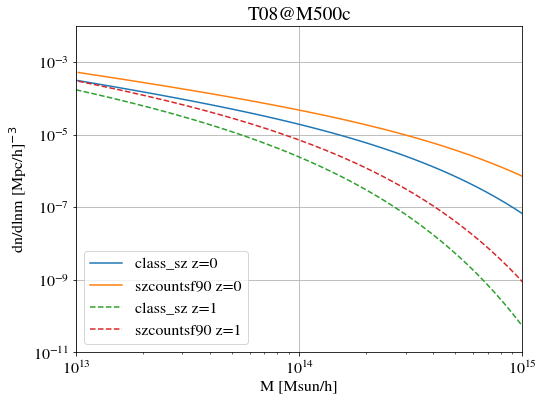

In [21]:
z = np.linspace(0.,4,5)
m = np.geomspace(1e13,1e15)
dn = np.vectorize(M.get_dndlnM_at_z_and_M) # mass in Msun/h and dndlnM in [Mpc/h]^-3
# for zz in z:
#     plt.plot(m,dn(zz,m),label='z=%.2f'%zz)
plt.plot(m,dn(0.,m),label='class_sz z=0')
me,dne = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/m_dndlnmdz_z0.txt',unpack=True)
plt.plot(exp(me),np.abs(dne),label='szcountsf90 z=0')

plt.plot(m,dn(1.,m),label='class_sz z=1',ls='--')
me,dne = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/m_dndlnmdz_z1.txt',unpack=True)
plt.plot(exp(me),np.abs(dne),label='szcountsf90 z=1',ls='--')
plt.loglog()
plt.grid()
plt.xlabel('M [Msun/h]')
plt.ylabel(r'dn/dlnm [Mpc/h]$^{-3}$')
plt.legend()
plt.ylim(1e-11,1e-2)
plt.xlim(1e13,1e15)
plt.title('T08@M500c')

In [41]:
M = Class()
M.set(cluster_settings)
M.set({
'mass function': 'T08'
})
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

h : 0.677322
sigma8 : 0.809711
Omega_m : 0.312457
n_s : 0.966050


Text(0.5, 1.0, 'T08@M200m')

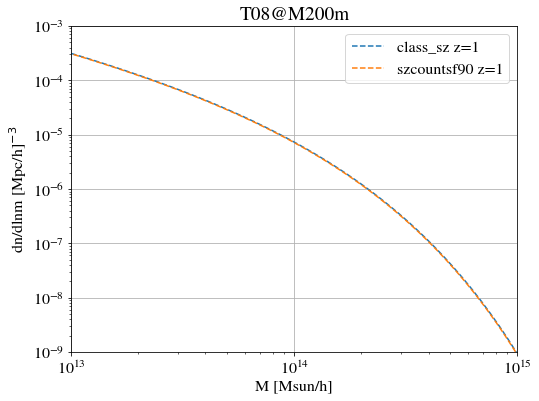

In [44]:
z = np.linspace(0.,4,5)
m = np.geomspace(1e13,1e15)
dn = np.vectorize(M.get_dndlnM_at_z_and_M) # mass in Msun/h and dndlnM in [Mpc/h]^-3
# for zz in z:
#     plt.plot(m,dn(zz,m),label='z=%.2f'%zz)
plt.plot(m,dn(1.,m),label='class_sz z=1',ls='--')
me,dne = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/m_dndlnm_M200m_z1_bis.txt',unpack=True)
plt.plot(me,np.abs(dne),label='szcountsf90 z=1',ls='--')

plt.loglog()
plt.grid()
plt.xlabel('M [Msun/h]')
plt.ylabel(r'dn/dlnm [Mpc/h]$^{-3}$')
plt.legend()
plt.ylim(1e-9,1e-3)
plt.xlim(1e13,1e15)
plt.title('T08@M200m')

In [6]:
M = Class()
M.set(cluster_settings)
M.set({

    
})
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

h : 0.677322
sigma8 : 0.809711
Omega_m : 0.312457
n_s : 0.966050


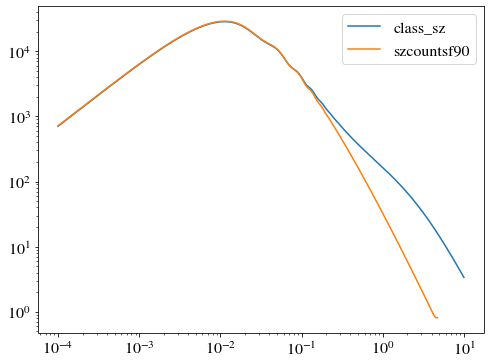

In [7]:
k_arr = np.geomspace(1e-4,1e1,1000)
z_arr = np.asarray([0.,1.,2.])
# the total matter pk (in Mpc**3) for a given k (in 1/Mpc) and z
matter_pk = np.vectorize(M.pk)
plt.plot(k_arr,matter_pk(k_arr,1.),label='class_sz')
ke,pke = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/k_pks_z1.txt',unpack=True)
plt.plot(ke,pke*M.h()**-3,label='szcountsf90')
plt.loglog()
plt.legend()

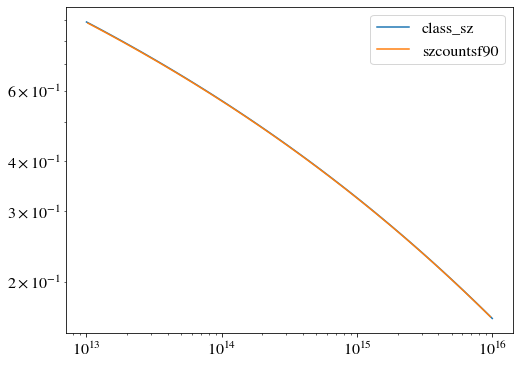

In [8]:
m_arr = np.geomspace(1e13,1e16,100)
get_sigma_at_z_and_m = np.vectorize(M.get_sigma_at_z_and_m)
plt.plot(m_arr,get_sigma_at_z_and_m(1.,m_arr),label='class_sz')
me,se = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/m_sigma_z1.txt',unpack=True)
plt.plot(exp(me),se,label='szcountsf90')
plt.loglog()
plt.legend()

In [4]:
# info = {
#     'params': params,
#     'likelihood': {'soliket.BinnedClusterLikelihood': {
#         'single_tile_test': "no",
#         'choose_dim': "1D",
#         'Q_optimise': "yes",
#         'stop_at_error': True,
#         'data_path': data_path,
#         'cat_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_mass.fits",
#         'Q_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/quick_theta_Q.npz",
#         'tile_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/tileAreas.txt",
#         'rms_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/downsampled.txt"}},
#     'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
# }
# 2D N calculation 

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
        'single_tile_test': "no",
        'choose_dim': "2D", # change option here 
        'Q_optimise': "yes",
        'stop_at_error': True,
        'data_path': data_path,
        'cat_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_mass.fits",
        'Q_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/quick_theta_Q.npz",
        'tile_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/tileAreas.txt",
        'rms_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/downsampled.txt"}},
    'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

[CAMB] Importing *auto-installed* CAMB (but defaulting to *global*).
[camb] Initialized!
 :::::: this is initialisation in binned_clusters.py
 :::::: reading catalogue
 Number of mass bins :  138
 SO for a full map
 2D likelihood as a function of redshift and signal-to-noise
 Total number of clusters in catalogue =  62475
 SNR cut =  7.0
 Number of clusters above the SNR cut =  18794
 The highest redshift = 2.46
 Number of redshift bins =  25
 Catalogue N
0 135.0
1 1075.0
2 1980.0
3 2434.0
4 2557.0
5 2362.0
6 2032.0
7 1628.0
8 1302.0
9 990.0
10 724.0
11 525.0
12 368.0
13 237.0
14 154.0
15 107.0
16 65.0
17 49.0
18 32.0
19 14.0
20 11.0
21 6.0
22 3.0
23 1.0
24 3.0
25 0.0
18794.0
 The lowest SNR = 7.00
 The highest SNR = 93.46
 Number of SNR bins =  6
 Edges of SNR bins =  [  3.98107171   7.07945784  12.58925412  22.38721139  39.81071706
  70.79457844 125.89254118]
 Catalogue N in SNR bins
 0 512.0
 1 14092.0
 2 3454.0
 3 642.0
 4 90.0
 5 4.0
 6 0.0
 :::::: loading files describing selecti

array([-2920.69938581])

In [5]:
# # initialisation 
# model = get_model(info)
# like = model.likelihood['soliket.BinnedClusterLikelihood']
# model.loglikes({})[0]
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)

In [6]:

SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.    
}
Nz = like._get_theory(pk_intp, **SZparams)

0 3872.8354898450075
1 11735.507543945476
2 4004.376902111637
3 801.0120471640187
4 102.78009891750995
5 6.829843899081136
0 232.53725451261545
1 1074.410354167578
2 2098.6756188716145
3 2670.3468561811874
4 2791.238858891218
5 2605.1942933960954
6 2252.9130498339487
7 1840.5683337786295
8 1437.0996741286594
9 1080.4744272219662
10 786.3816615197201
11 556.1539074493664
12 383.345534206385
13 258.0894609989757
14 170.04135333284233
15 109.78244314311415
16 69.54624755010208
17 43.2686222026541
18 26.463643538742527
19 15.920985138198986
20 9.428950733127339
21 5.499500588379436
22 3.1609493624120053
23 1.7909395048999064
24 1.0090056302983155
25 0.0
 Total predicted 2D N =  20523.34192588273
 ::: theory N calculation took 29.4 seconds


In [7]:
z, catNz =  like.delNcat

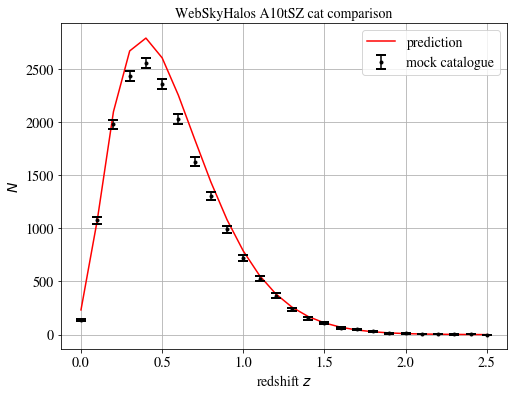

In [8]:
plt.figure(figsize=(8,6))
plt.plot(z, Nz.sum(axis=1), 'r-', label='prediction')
plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('redshift $z$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

In [9]:
# Nzq = like._get_theory(pk_intp, **SZparams)
z, q, catNzq = like.delN2Dcat

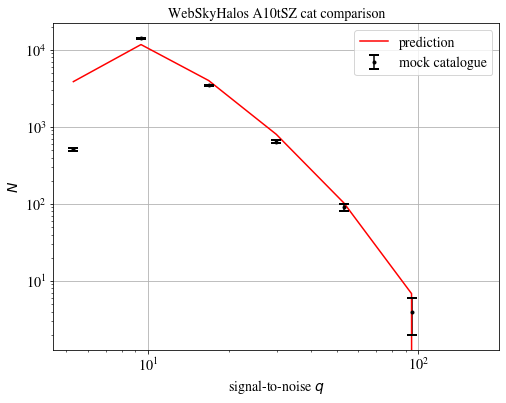

In [10]:
Nq = np.zeros(len(q))
catNq = np.zeros(len(q))
for i in range(len(q)):
   Nq[i] = Nz[:,i].sum()    
   catNq[i] = catNzq[:,i].sum()

plt.figure(figsize=(8,6))
plt.plot(10**q, Nq, 'r-', label='prediction')
plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.xlabel('signal-to-noise $q$', fontsize=14)
plt.ylabel('$N$', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.title('WebSkyHalos A10tSZ cat comparison', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

In [44]:
quick_theta_Q = np.load(data_path+"MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/quick_theta_Q.npz")

In [21]:
snrcut = 5
from classy_sz import Class
M = Class()
M.set(cluster_settings)
M.set({
'apply_relativistic_correction_to_y_m':0,
'signal-to-noise cut-off for survey cluster completeness' : snrcut,
'use_websky_m200m_to_m200c_conversion': 1,



'dlny' : 0.1, #HW used to be 0.01, #step in y integral
'lnymin' : -11., #HW no impact
'lnymax' : 10., #HW no impact

'dlnM_cluster_count_completeness_grid' : 0.07, #HW used to be 0.01, try bigger, big impact on speed


'cluster_count_completeness_grid_z_cutoff_low' : 0.5, #HW good value, #integrating over redshift, different regeims
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5, #HW no change

'dz_cluster_count_completeness_grid_low_z' : 0.015, #HW used to be 0.001
'dz_cluster_count_completeness_grid_mid_z' : 0.12, #HW used to be 0.1
'dz_cluster_count_completeness_grid_high_z' : 0.2, #HW used to be 1e-1, #try taking bigger steps

'mass_epsrel_cluster_counts' : 1e-3, #leave as is
'mass_epsabs_cluster_counts' : 1e-30,

'redshift_epsrel_cluster_counts' : 1e-3, #leave as is
'redshift_epsabs_cluster_counts' : 1e-30,

# # tabulation of mass function:
'n_z_dndlnM' : 80, #HW previously 150
'n_m_dndlnM' : 50, #HW previously 150

# # computation of mass function
# # (grid in mass and redshifts for sigma and dsigma)
    #HW these are extremely high, try 80 or 100
'ndim_masses' : 100, #HW previoulsy 250, big impact on speed
'ndim_redshifts' : 80, #HW previously 250, big impact on speed

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 18., #HW previously 20, last one I can change
'k_min_for_pk_class_sz' : 1e-3, #Don't change below this
'k_max_for_pk_class_sz' : 1e1,

'P_k_max_h/Mpc' : 1e0,
'non linear': 'halofit'


})
M.compute()
print('h : %f'%M.h())
print('sigma8 : %f'%M.sigma8())
print('Omega_m : %f'%M.Omega_m())
print('n_s : %f'%M.n_s())

M_with_rel = Class()
M_with_rel.set(cluster_settings)
M_with_rel.set({
'apply_relativistic_correction_to_y_m':1,
'signal-to-noise cut-off for survey cluster completeness' : snrcut,

'dlny' : 0.1, #HW used to be 0.01, #step in y integral
'lnymin' : -11., #HW no impact
'lnymax' : 10., #HW no impact

'dlnM_cluster_count_completeness_grid' : 0.07, #HW used to be 0.01, try bigger, big impact on speed


'cluster_count_completeness_grid_z_cutoff_low' : 0.5, #HW good value, #integrating over redshift, different regeims
'cluster_count_completeness_grid_z_cutoff_mid' : 1.5, #HW no change

'dz_cluster_count_completeness_grid_low_z' : 0.015, #HW used to be 0.001
'dz_cluster_count_completeness_grid_mid_z' : 0.12, #HW used to be 0.1
'dz_cluster_count_completeness_grid_high_z' : 0.2, #HW used to be 1e-1, #try taking bigger steps

'mass_epsrel_cluster_counts' : 1e-3, #leave as is
'mass_epsabs_cluster_counts' : 1e-30,

'redshift_epsrel_cluster_counts' : 1e-3, #leave as is
'redshift_epsabs_cluster_counts' : 1e-30,

# # tabulation of mass function:
'n_z_dndlnM' : 80, #HW previously 150
'n_m_dndlnM' : 50, #HW previously 150

# # computation of mass function
# # (grid in mass and redshifts for sigma and dsigma)
    #HW these are extremely high, try 80 or 100
'ndim_masses' : 100, #HW previoulsy 250, big impact on speed
'ndim_redshifts' : 80, #HW previously 250, big impact on speed

# pk setup for computation of sigma and dsigma
'k_per_decade_class_sz' : 18., #HW previously 20, last one I can change
'k_min_for_pk_class_sz' : 1e-3, #Don't change below this
'k_max_for_pk_class_sz' : 1e1,

'P_k_max_h/Mpc' : 1e0,
'non linear': 'halofit'


})
M_with_rel.compute()
print('h : %f'%M_with_rel.h())
print('sigma8 : %f'%M_with_rel.sigma8())
print('Omega_m : %f'%M_with_rel.Omega_m())
print('n_s : %f'%M_with_rel.n_s())

h : 0.677322
sigma8 : 0.809711
Omega_m : 0.312457
n_s : 0.966050
h : 0.677322
sigma8 : 0.809711
Omega_m : 0.312457
n_s : 0.966050


In [22]:
dNdzdy_theoretical = M.dndzdy_theoretical()['dndzdy']
dNdzdy_theoretical_with_rel = M_with_rel.dndzdy_theoretical()['dndzdy']
z_center = M.dndzdy_theoretical()['z_center']
z_edges = M.dndzdy_theoretical()['z_edges']
log10y_center = M.dndzdy_theoretical()['log10y_center']
log10y_edges = M.dndzdy_theoretical()['log10y_edges']
# M.struct_cleanup()
# M.empty()

In [23]:
N_z,N_y = np.shape(dNdzdy_theoretical)
N_clusters_z_theory = []
N_clusters_z_theory_with_rel = []
for iz in range(N_z):
    N_clusters_z_theory.append(np.sum(dNdzdy_theoretical[iz]))
    N_clusters_z_theory_with_rel.append(np.sum(dNdzdy_theoretical_with_rel[iz]))
N_clusters_y_theory = []
N_clusters_y_theory_with_rel = []
for iy in range(N_y):
    N_clusters_y_theory.append(np.sum(np.asarray(dNdzdy_theoretical)[:,iy]))
    N_clusters_y_theory_with_rel.append(np.sum(np.asarray(dNdzdy_theoretical_with_rel)[:,iy]))



In [24]:

# here puth the path to the directory : e.g. MFMF_SOSim_3freq_tiles
path_to_catalogue = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/'
from astropy.io import fits
tcat = path_to_catalogue+'MFMF_WebSkyHalos_A10tSZ_3freq_tiles_mass.fits'
list = fits.open(tcat)
data = list[1].data
zc = data.field("redshift")
snr = data.field("SNR")
tile = data.field("tileName")

zc = zc[snr > snrcut]
snr = snr[snr > snrcut]
sf = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/so_3freqs_191121_skyfracs.txt')
print('sky fraction:',sf.sum())



sky fraction: 0.4335327806600558


(0.0, 2.0)

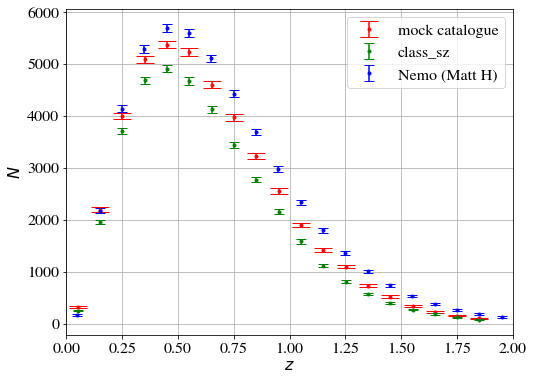

In [25]:
N_clusters_z, xedges = np.histogram(zc, bins=z_edges)
plt.errorbar(z_center,N_clusters_z,yerr=np.sqrt(N_clusters_z),marker='o',markersize=3.,ls='none',label='mock catalogue',capsize=9,c='r')
# 41253./599.?
sf = 41253./599.
# n, bins, patches = plt.hist(x=np.repeat(z_center,N_clusters_z_theory), bins=z_edges, color='orange',alpha=0.7, rwidth=0.95,label='class_sz')
plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=3.,ls='none',label='class_sz',capsize=5,c='green')
# plt.errorbar(z_center,N_clusters_z_theory_with_rel,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=3.,ls='none',label='class_sz (rel. corr.)',capsize=5,c='k')
plt.errorbar(z_nemo,Nz_selfn,yerr=np.sqrt(Nz_selfn),marker='o',markersize=3.,ls='none',label=r'Nemo (Matt H)',capsize=5,c='b')


# ze,nze = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/z_N.txt',unpack=True)
# plt.plot(ze,nze,label='szcountsf90')
# plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='blue', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
# plt.errorbar(z_nemo,Nz_selfn,yerr=np.sqrt(Nz_selfn),marker='o',markersize=3.,ls='none',label=r'Nemo (Matt H)',capsize=5,c='b')

# plt.errorbar(z+0.05, Nz.sum(axis=1), yerr=np.sqrt(Nz.sum(axis=1)), color='blue', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='szcountsf90')




plt.grid()
plt.legend(loc=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
# plt.yscale('log')
# plt.ylim(1e0,6.e7)
plt.xlim(0.,2.)

(0.0, 2.0)

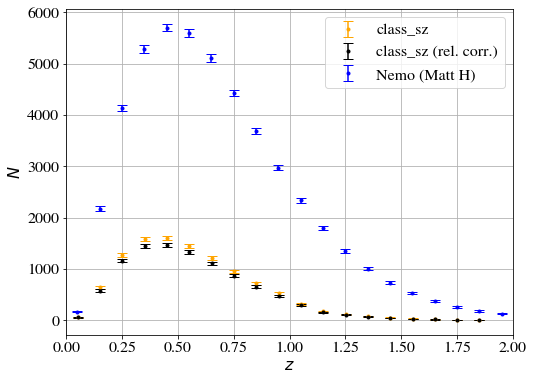

In [12]:
N_clusters_z, xedges = np.histogram(zc, bins=z_edges)
#plt.errorbar(z_center,N_clusters_z,yerr=np.sqrt(N_clusters_z),marker='o',markersize=3.,ls='none',label='mock catalogue',capsize=5,c='r')
# 41253./599.?
sf = 41253./599.
# n, bins, patches = plt.hist(x=np.repeat(z_center,N_clusters_z_theory), bins=z_edges, color='orange',alpha=0.7, rwidth=0.95,label='class_sz')
plt.errorbar(z_center,N_clusters_z_theory,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=3.,ls='none',label='class_sz',capsize=5,c='orange')
plt.errorbar(z_center,N_clusters_z_theory_with_rel,yerr=np.sqrt(N_clusters_z_theory),marker='o',markersize=3.,ls='none',label='class_sz (rel. corr.)',capsize=5,c='k')
# ze,nze = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/z_N.txt',unpack=True)
# plt.plot(ze,nze,label='szcountsf90')
# plt.errorbar(z, catNz, yerr=np.sqrt(catNz), color='blue', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')
plt.errorbar(z_nemo,Nz_selfn,yerr=np.sqrt(Nz_selfn),marker='o',markersize=3.,ls='none',label=r'Nemo (Matt H)',capsize=5,c='b')
#plt.errorbar(z+0.05, Nz.sum(axis=1), yerr=np.sqrt(Nz.sum(axis=1)), color='blue', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='szcountsf90')




plt.grid()
plt.legend(loc=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
# plt.yscale('log')
# plt.ylim(1e0,6.e7)
plt.xlim(0.,2.)

In [17]:
np.sum(N_clusters_z)

43148

In [11]:
N_clusters_z_theory

[361.55366162892415,
 2653.8349473380986,
 5078.4388504924555,
 6633.2185813926435,
 7317.102077206368,
 7434.687334069431,
 7139.125906293043,
 5758.498747782554,
 6039.972608764588,
 5455.450372835504,
 4862.788750509824,
 4337.262936342428,
 3940.2842512372367,
 3590.0579753491165,
 3280.164424478225,
 3004.302137954353,
 2752.6356751288517,
 2520.5086106682384,
 2298.2864415616677]

(1.0, 5000000.0)

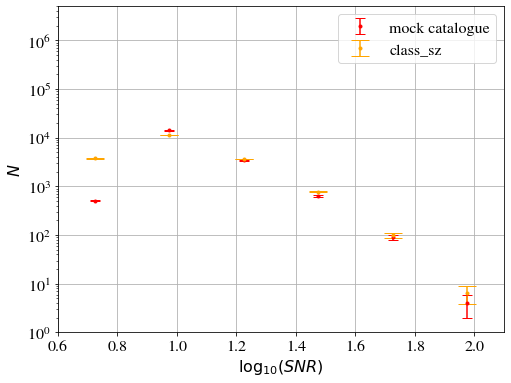

In [40]:
N_clusters_y, xedges = np.histogram(np.log10(snr), bins=log10y_edges)
plt.errorbar(log10y_center,N_clusters_y,yerr=np.sqrt(N_clusters_y),marker='o',markersize=3.,ls='none',label='mock catalogue',capsize=5,c='r')
# n, bins, patches = plt.hist(x=np.repeat(log10y_center,N_clusters_y_theory), bins=log10y_edges, color='orange',alpha=0.7, rwidth=0.95, label='class_sz')
plt.errorbar(log10y_center,N_clusters_y_theory,yerr=np.sqrt(N_clusters_y_theory),marker='o',markersize=3.,ls='none',label='class_sz',capsize=9,c='orange')
# plt.errorbar(log10y_center,N_clusters_y_theory_with_rel,yerr=np.sqrt(N_clusters_y_theory_with_rel),marker='o',markersize=3.,ls='none',label='class_sz (rel. corr.)',capsize=5,c='k')



# plt.errorbar(q, Nq, yerr=np.sqrt(Nq), color='blue', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='szcountsf90')

# plt.errorbar(10**q, catNq, yerr=np.sqrt(catNq), color='black', fmt='o', ms=3, capsize=5, capthick=2, ls='none', label='mock catalogue')



plt.grid()
plt.legend()
plt.xlabel(r'$\log_{10}(SNR)$')
plt.ylabel(r'$N$')
plt.yscale('log')
plt.xlim(0.6,2.1)
plt.ylim(1.,5e6)

In [15]:
from nemo import *
path_to_selfn = '/Users/boris/Work/CLASS-SZ/SO-SZ/so_cluster_counts/MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/'


configFileName=path_to_selfn+'config.yml'
selFnDir=path_to_selfn
SNRCut=5.
zStep=0.1
footprintLabel=None

print(">>> Setting up SNR > %.2f selection function ..." % (SNRCut))
selFn=completeness.SelFn(selFnDir, SNRCut, configFileName = configFileName, 
                         footprintLabel = footprintLabel, zStep = zStep)

scalingRelationDict=selFn.scalingRelationDict
H0, Om0, Ob0, sigma8, ns = M.h()*100., M.Omega_m(),M.Omega_b()*M.h()**2., M.sigma8(), M.n_s()
h=H0/100.0
selFn.update(H0, Om0, Ob0, sigma8, ns, scalingRelationDict = scalingRelationDict)
print("Total area = %.3f square degrees" % (selFn.totalAreaDeg2))

# N(z) with M500c > 5e13 MSun - no selection function applied
countsByRedshift=selFn.mockSurvey.clusterCount[:, np.greater(selFn.mockSurvey.log10M, np.log10(5e13/h))].sum(axis = 1)
z_nemo = []
Nz_noselfn = []
Nz_selfn = []

# with open("NzCheck_noSelFn.csv", "w") as outFile:
for i in range(len(selFn.mockSurvey.z)):
    z_nemo.append((selFn.mockSurvey.zBinEdges[i]+selFn.mockSurvey.zBinEdges[i+1])/2.)
    Nz_noselfn.append(countsByRedshift[i])
#     print("%.1f <= z < %.1f\t%.3f\n" % (selFn.mockSurvey.zBinEdges[i], selFn.mockSurvey.zBinEdges[i+1], countsByRedshift[i]))

# N(z) with M500c > 5e13 MSun - with S/N > 5 selection function applied
predMz=selFn.compMz*selFn.mockSurvey.clusterCount
countsByRedshift=predMz[:, np.greater(selFn.mockSurvey.log10M, np.log10(5e13*h))].sum(axis = 1)
# with open("NzCheck_withSelFn.csv", "w") as outFile:
for i in range(len(selFn.mockSurvey.z)):
#     z.append(selFn.mockSurvey.zBinEdges[i]+selFn.mockSurvey.zBinEdges[i+1])/2.)
    Nz_selfn.append(countsByRedshift[i])
#     print("%.1f <= z < %.1f\t%.3f\n" % (selFn.mockSurvey.zBinEdges[i], selFn.mockSurvey.zBinEdges[i+1], countsByRedshift[i]))



>>> Setting up SNR > 5.00 selection function ...
Total area = 17884.528 square degrees
